In [1]:
!pip install wordcloud
!pip install Sastrawi

DEPRECATION: masonite 4.17.4 has a non-standard dependency specifier inflection>=0.3<0.4. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of masonite or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: masonite 4.17.4 has a non-standard dependency specifier exceptionite>=2.2<3.0. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of masonite or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: masonite 4.17.4 has a non-standard dependency specifier cryptography>=36<37. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of masonite or contact the author to suggest that they releas

DEPRECATION: masonite 4.17.4 has a non-standard dependency specifier inflection>=0.3<0.4. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of masonite or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: masonite 4.17.4 has a non-standard dependency specifier exceptionite>=2.2<3.0. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of masonite or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: masonite 4.17.4 has a non-standard dependency specifier cryptography>=36<37. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of masonite or contact the author to suggest that they releas

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\oi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Dataset preview:
   no                                               text
0   1  PBB ungkap bahwa toko roti di Gaza Utara teran...
1   2  Menteri Ketenagakerjaan akan adakan Job Fair t...
2   3  DPR tetapkan program pengampunan pajak jadi pr...
3   4  Prabowo harap India kirim profesor & dokter un...
4   5  Indonesia kalahkan Arab Saudi 2-0 di kualifika...
Most common words:
[('jadi', 12), ('indonesia', 10), ('prabowo', 9), ('rp', 8), ('makan', 7), ('menteri', 6), ('dpr', 6), ('ajar', 6), ('ibu', 6), ('kasus', 6)]


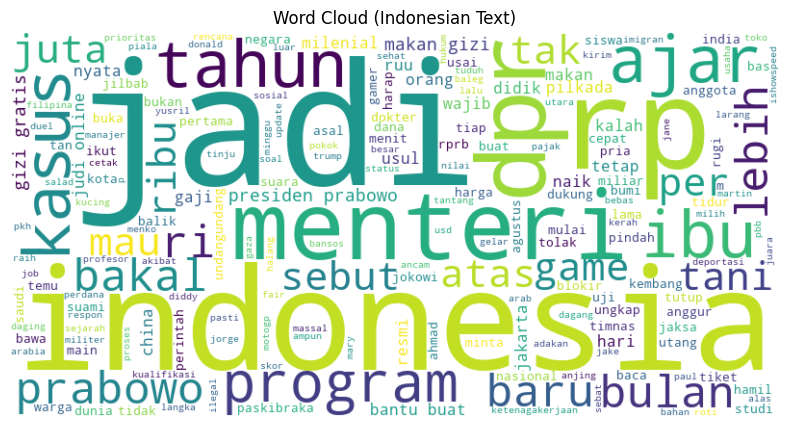

Overall Sentiment Summary:
{'Positive': 0.007802469135802469, 'Neutral': 0.9870864197530865, 'Negative': 0.005111111111111111}


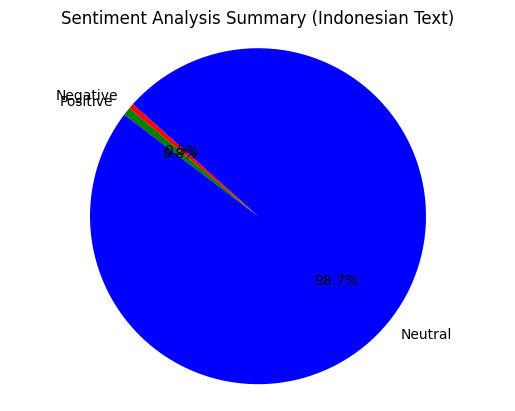

Analysis results saved to 'dataset_with_sentiments.csv'


In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re

nltk.download('vader_lexicon')

csv_file = "dataset.csv"
df = pd.read_csv(csv_file)

print("Dataset preview:")
print(df.head())

if 'text' not in df.columns:
    raise ValueError("The CSV does not have a 'text' column. Check your file.")

all_text = " ".join(df['text'].dropna().astype(str))

factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

all_text_cleaned = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())
all_text_cleaned = stemmer.stem(stopword_remover.remove(all_text_cleaned))


words = all_text_cleaned.split()
filtered_words = [word for word in words if word]

word_counts = Counter(filtered_words)
print("Most common words:")
print(word_counts.most_common(10))

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='viridis').generate(" ".join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (Indonesian Text)")
plt.show()

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].dropna().astype(str).apply(lambda x: sia.polarity_scores(x))

df['positive'] = df['sentiment'].apply(lambda x: x['pos'])
df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])
df['negative'] = df['sentiment'].apply(lambda x: x['neg'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

sentiment_summary = {
    "Positive": df['positive'].mean(),
    "Neutral": df['neutral'].mean(),
    "Negative": df['negative'].mean()
}
print("Overall Sentiment Summary:")
print(sentiment_summary)

labels = list(sentiment_summary.keys())
sizes = list(sentiment_summary.values())
colors = ['green', 'blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Analysis Summary (Indonesian Text)")
plt.axis('equal')
plt.show()

df.to_csv("dataset_with_sentiments.csv", index=False)
print("Analysis results saved to 'dataset_with_sentiments.csv'")


In [3]:
csv_file = "dataset_with_sentiments.csv"
df_result = pd.read_csv(csv_file)
print(df_result.head(10))

   no                                               text  \
0   1  PBB ungkap bahwa toko roti di Gaza Utara teran...   
1   2  Menteri Ketenagakerjaan akan adakan Job Fair t...   
2   3  DPR tetapkan program pengampunan pajak jadi pr...   
3   4  Prabowo harap India kirim profesor & dokter un...   
4   5  Indonesia kalahkan Arab Saudi 2-0 di kualifika...   
5   6  Baleg DPR tolak usulan RUU larang perdagangan ...   
6   7  Donald Trump akan kerahkan militer untuk depor...   
7   8  Menteri Sosial pastikan ibu hamil dapat Bansos...   
8   9  Manajer Jake Paul respon balik tantangan duel ...   
9  10  Jorge Martin raih gelar perdananya sebagai jua...   

                                           sentiment  positive  neutral  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
1  {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...     0.161    0.839   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

In [4]:
positive = df[df_result['positive'] > 0]
print("Positive Sentiments:")
print(positive['text'].head())

Positive Sentiments:
1     Menteri Ketenagakerjaan akan adakan Job Fair t...
50    Pemerintah rogoh Rp800 Miliar per hari buat pr...
61    Mengharukan, Viral Bocah Kelas 4 SD Tak Mau Ma...
65    China Akan Bantu Buat Danai Makan Bergizi Grat...
78    Setelah china, Presiden AS Joe Biden nyatakan ...
Name: text, dtype: object


In [5]:
negative = df[df_result['negative'] > 0]
print("Negative Sentiments:")
print(negative['text'].head())

Negative Sentiments:
48    Harga saham Ubisoft terus anjlok sejak kacauny...
53    Finalis Miss Swiss dibun*h suaminya sendiri, d...
Name: text, dtype: object


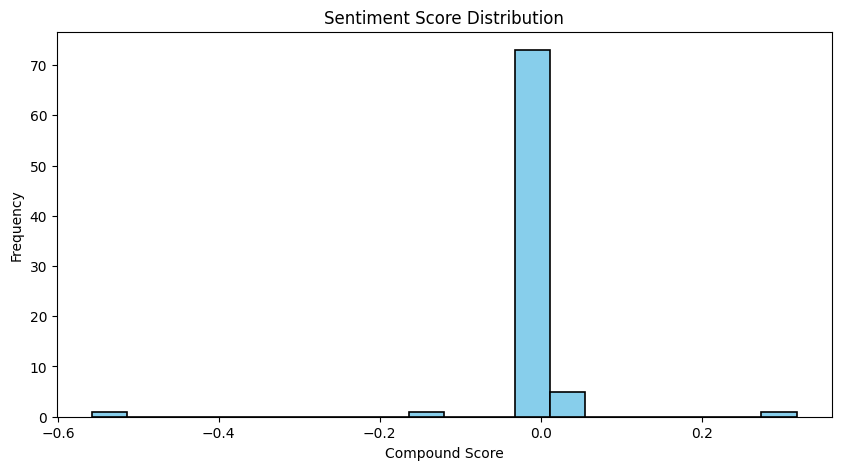

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(df_result['compound'], bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title("Sentiment Score Distribution")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

In [7]:
df_kaggle = pd.read_csv("./dataset/kaggle/Data_latih.csv")

print("Dataset preview:")
print(df_kaggle.head())

Dataset preview:
    ID  label    tanggal                                              judul  \
0   71      1  17-Aug-20  Pemakaian Masker Menyebabkan Penyakit Legionna...   
1  461      1  17-Jul-20  Instruksi Gubernur Jateng tentang penilangan  ...   
2  495      1  13-Jul-20  Foto Jim Rohn: Jokowi adalah presiden terbaik ...   
3  550      1   8-Jul-20  ini bukan politik, tapi kenyataan Pak Jokowi b...   
4  681      1  24-Jun-20       Foto Kadrun kalo lihat foto ini panas dingin   

                                              narasi nama file gambar  
0  A caller to a radio talk show recently shared ...           71.jpg  
1  Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...          461.png  
2  Jokowi adalah presiden terbaik dlm sejarah ban...          495.png  
3  Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...          550.png  
4        Kadrun kalo lihat foto ini panas dingin . .          681.jpg  


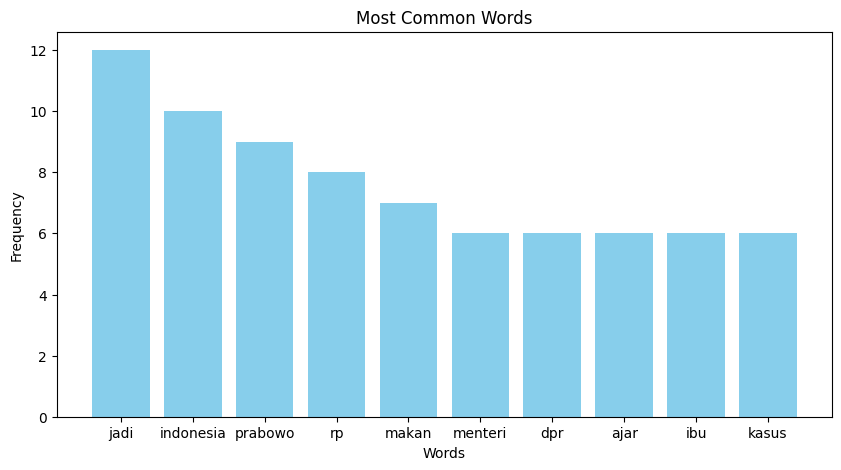

In [10]:
most_common_words = word_counts.most_common(10)
words = [word[0] for word in most_common_words]

plt.figure(figsize=(10, 5))
plt.bar(words, [word[1] for word in most_common_words], color='skyblue')
plt.title("Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


